This jupyter notebook contains basic blocks which creates obs .noos files and correct xml files for the openda models

In [103]:
import numpy as np
import os
import datetime
import xml.etree.ElementTree as ET

The first step is to get water level data of a particular tide gauge for a given month.

In [105]:

def getmonthdata(tgfile,newtgfile,month):
    wltimdata=np.loadtxt(tgfile,skiprows=2,usecols=0,dtype='str')
    hdata=np.array(np.loadtxt(tgfile,skiprows=2,usecols=1))
    monthval=monthdict[month]
    timdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in wltimdata]
    monthvec=np.array([datetime.datetime.strftime(i,"%m") for i in timdata])
    index=np.where(monthvec==monthval)
    index=np.append(index,index[-1]+1)
    monthhdata=hdata[index]
    monthtimdata=wltimdata[index]
    vec=np.hstack((monthtimdata.reshape(len(monthtimdata),1),monthhdata.reshape(len(monthhdata),1)))
    f = open(tgfile, "r")
    lines = f.readlines()
    f.close()
    headstring=[]
    for line in lines[:2]:
        headstring.append(line)
    print(str(headstring))    
    np.savetxt(newtgfile,vec,fmt='%s',delimiter="\t\t",header=str(headstring[:]))

    
def convertwl2noos(tgfile,newtgfile):
    #skiprows 1 for month file and all year file it is 2.
    timdata=np.loadtxt(tgfile,skiprows=1,usecols=0,dtype='str')
    timdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in timdata]
    noostimdata=np.array([datetime.datetime.strftime(i,"%Y%m%d%H%M") for i in timdata])
    hdata=np.array(np.loadtxt(tgfile,skiprows=1,usecols=1))
    vec=np.hstack((noostimdata.reshape(len(noostimdata),1),hdata.reshape(len(hdata),1)))
    f = open(tgfile, "r")
    lines = f.readlines()
    f.close()
    headstring=[]
    for line in lines[:2]:
        headstring.append(line)
    print(str(headstring))   
    np.savetxt(newtgfile,vec,fmt='%s',delimiter="\t\t",header=str(headstring[:]))


Getting the observations of tide gauges. We start by getting the TG in the domain of the polygon which defines our parameters.

In [90]:
datafolder='CHSdata'
tstafile='/u/vasulkar/p_emodnet_amey/Regional_canada_model/bathymetry_checks/CHSTG.xyn'  #file of all the TG stations in the regional model domain.
tstaposdata=np.loadtxt(tstafile,usecols=(0,1),dtype='float')
tstanamdata=np.loadtxt(tstafile,usecols=(2),dtype='str',delimiter='\t')
#polygon of parameters.
lon1=-99.0;lon2=-77.0
lat1=50.0;lat2=64.0
#getting TG in this domain.
selTGpos=[];selTGnam=[]
lonvec=[];latvec=[]
for i in range(len(tstanamdata)):
    loni=tstaposdata[i,0]
    lati=tstaposdata[i,1]
    if -99.0<=loni<=-77.0 and 50.0<=lati<=64.0:
        selTGnam=np.append(selTGnam,tstanamdata[i])
        lonvec=np.append(lonvec,loni)
        latvec=np.append(latvec,lati)
selTGpos=np.vstack((lonvec,latvec)).T


plot the tg to check if the lie in the polygon.

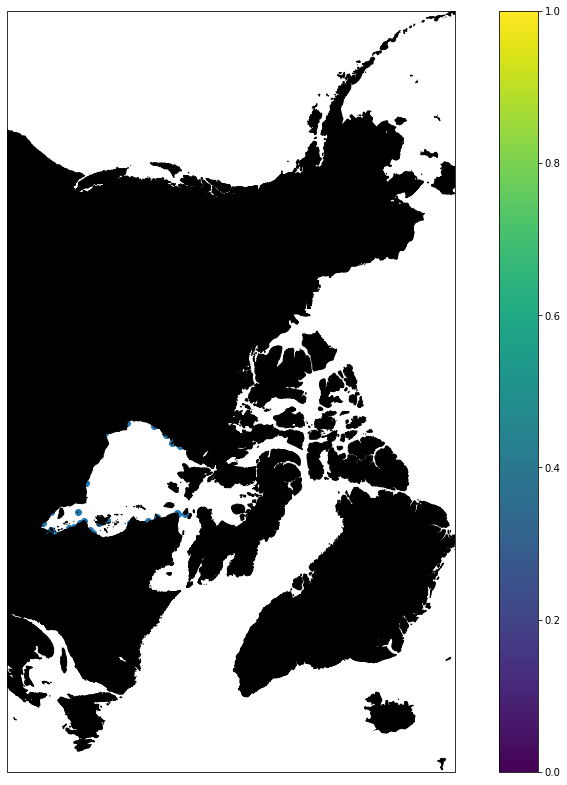

In [91]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 

fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90]) 
# cbarlabel='Difference(March-Sept)' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
cont1=ax1.scatter(selTGpos[:,0],selTGpos[:,1],transform=ccrs.PlateCarree(),marker='o')
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
# cbar.set_label(cbarlabel, rotation=90, fontsize=18)
# cbar.ax.tick_params(labelsize=18)
plt.show()

Now get the .wl files for all the selected TG. Next convert the .wl tidegauge files from the curent format to a .noos format in which the date is changed from 2020-01-01T00:00:00Z to 202001010000

In [107]:
tgfileloc='/u/vasulkar/p_emodnet_amey/Regional_canada_model/bathymetry_checks/CHSdata/'
newtgfileloc='/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/Observations/CHSTG/March_HudsonBAY/'
monthdict={'Jan':'01', 'Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
            'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
month='Mar'
sdate='202003010000'
edate='202004010000'
for i in range(len(selTGnam)):
    tgname=selTGnam[i][1:-1]
    tgfile=tgfileloc+tgname+'.wl'
    newtgfile=newtgfileloc+tgname+'_'+month+'.wl'

    getmonthdata(tgfile,newtgfile,month)
    #converting to .noos file
    noostgfile=newtgfileloc+tgname+'_'+month+'.noo'
    convertwl2noos(newtgfile,noostgfile)


['# Station Name:Akulivik\t Station number:1\tStation id:5cebf1dd3d0f4a073c4bb8d7\n', '# Lon:-78.219061\tLat:60.801507\n']
["# ['# Station Name:Akulivik\\t Station number:1\\tStation id:5cebf1dd3d0f4a073c4bb8d7\\n', '# Lon:-78.219061\\tLat:60.801507\\n']\n", '2020-03-01T00:00:00Z\t\t0.265\n']
['# Station Name:Panorama Island\t Station number:4\tStation id:5cebf1dd3d0f4a073c4bb905\n', '# Lon:-92.094102\tLat:62.79141\n']
["# ['# Station Name:Panorama Island\\t Station number:4\\tStation id:5cebf1dd3d0f4a073c4bb905\\n', '# Lon:-92.094102\\tLat:62.79141\\n']\n", '2020-03-01T00:00:00Z\t\t3.028\n']
['# Station Name:Eastmain River\t Station number:6\tStation id:5cebf1dd3d0f4a073c4bb8ed\n', '# Lon:-78.55\tLat:52.25\n']
["# ['# Station Name:Eastmain River\\t Station number:6\\tStation id:5cebf1dd3d0f4a073c4bb8ed\\n', '# Lon:-78.55\\tLat:52.25\\n']\n", '2020-03-01T00:00:00Z\t\t0.895\n']
['# Station Name:Bear Island\t Station number:474\tStation id:5cebf1e23d0f4a073c4bbfe3\n', '# Lon:-78.35\tLat:

Now creating a xml file which has all the TG and correct start and end time.

In [139]:
tempxmlfile='/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/Observations/CHSTG/noosObservations_template.xml'
tree=ET.parse(tempxmlfile)
root=tree.getroot()

for i in range(len(selTGnam))[:1]:
    tgname=selTGnam[i][1:-1]
    atgname=tgname+'_'+month+'.waterlevel'
    attrib=root[0].attrib
    attrib['minDateTime']=sdate
    attrib['maxDateTime']=edate
    attrib['id']=atgname
    textval=tgname+'_'+month+'.noo'
    subelement = root[0].makeelement('timeSeries', attrib)
    root[0].text=textval

for elem in root.iter():
    print(elem.attrib)
    print(elem.text)

newxmlfile=newtgfileloc+'noosObsfile.xml'
tree.write(newxmlfile)

{}

	
	
{'status': 'use', 'standardDeviation': '0.05', 'minDateTime': '202003010000', 'maxDateTime': '202004010000', 'id': 'Akulivik_Mar.waterlevel'}
Akulivik_Mar.noo
{'status': 'use', 'standardDeviation': '0.05', 'minDateTime': '202001010000', 'maxDateTime': '202002010000', 'id': 'whalecove_jan.waterlevel'}

		whalecove_jan.noos
	


Getting points in a domain to obtain parameters.

In [77]:
def createparamgridvec(lon1,lon2,lat1,lat2,N,id):
    lonvec=np.linspace(lon1,lon2,N)
    latvec=np.linspace(lat1,lat2,N)
    X,Y=np.meshgrid(lonvec,latvec)
    vec=np.vstack((X.flatten(),Y.flatten()))
    paraidvec=id*(np.ones(len(X.flatten()))).astype(int)
    vec=np.vstack((vec,paraidvec.reshape((1,len(paraidvec)))))
    return(vec)


We will create the template file initially!

we automate the number of parameter creation with a grid

In [56]:
fname='horizontaleddy_correction_template_new.xyz'
lon1=-99.0;lon2=-77.0
lat1=50.0;lat2=64.0
#nx and ny are dimensions of main grid 
nx=3
ny=2
latvec=np.linspace(lat1,lat2,ny+1)
lonvec=np.linspace(lon1,lon2,nx+1)
id=1
N=10
vec=np.ones((3,N**2))
for i in range(len(latvec)-1):
    for j in range(len(lonvec-1)-1):
        lon1=lonvec[j];lon2=lonvec[j+1]
        lat1=latvec[i];lat2=latvec[i+1]
        print(id)
        print(lon1,lon2,lat1,lat2)
        vec1=createparamgridvec(lon1,lon2,lat1,lat2,N,id)
        vec=np.hstack((vec,vec1))
        id+=1
vec=vec[:,100:]
np.savetxt(fname,vec.T,fmt=['%0.2f','%0.2f','%d'],delimiter='\t')      
    

1
-99.0 -91.66666666666667 50.0 57.0
2
-91.66666666666667 -84.33333333333333 50.0 57.0
3
-84.33333333333333 -77.0 50.0 57.0
4
-99.0 -91.66666666666667 57.0 64.0
5
-91.66666666666667 -84.33333333333333 57.0 64.0
6
-84.33333333333333 -77.0 57.0 64.0


In [60]:
fname='horizontaleddy_correction_6.xyz'
lon1=-99.0;lon2=-77.0
lat1=50.0;lat2=64.0
#nx and ny are dimensions of main grid 
nx=3
ny=2
latvec=np.linspace(lat1,lat2,ny+1)
lonvec=np.linspace(lon1,lon2,nx+1)
id=1
N=10
vec=np.ones((3,N**2))
for i in range(len(latvec)-1):
    for j in range(len(lonvec-1)-1):
        lon1=lonvec[j];lon2=lonvec[j+1]
        lat1=latvec[i];lat2=latvec[i+1]
        print(id)
        print(lon1,lon2,lat1,lat2)
        vec1=createparamgridvec(lon1,lon2,lat1,lat2,N,id)
        vec=np.hstack((vec,vec1))
        id+=1
vec=vec[:,100:]
vec[2,:]=1.0
np.savetxt(fname,vec.T,fmt=['%0.2f','%0.2f','%0.2f'],delimiter='\t') 

1
-99.0 -91.66666666666667 50.0 57.0
2
-91.66666666666667 -84.33333333333333 50.0 57.0
3
-84.33333333333333 -77.0 50.0 57.0
4
-99.0 -91.66666666666667 57.0 64.0
5
-91.66666666666667 -84.33333333333333 57.0 64.0
6
-84.33333333333333 -77.0 57.0 64.0


The below was test for just two parameters


In [44]:
fname='horizontaleddy_correction_template_2.xyz'
N=10
id=1
lon1=-99.0;lon2=-85.0
lat1=50.0;lat2=63.0
vec1=createparamgridvec(lon1,lon2,lat1,lat2,N,id)
id=2

lon1=-85.0;lon2=-77.0
lat1=50.0;lat2=63.0
vec2=createparamgridvec(lon1,lon2,lat1,lat2,N,id)
vec=np.hstack((vec1,vec2))
# np.savetxt(fname,vec.T,fmt=['%0.2f','%0.2f','%d'],delimiter='\t')
print(vec.shape)


(3, 200)


Now we will create the normal value file



In [ ]:
fname='horizontaleddy_correction_2.xyz'
N=10
id=1
lon1=-99.0;lon2=-85.0
lat1=50.0;lat2=63.0
vec1=createparamgridvec(lon1,lon2,lat1,lat2,N,id)
id=2

lon1=-85.0;lon2=-77.0
lat1=50.0;lat2=63.0
vec2=createparamgridvec(lon1,lon2,lat1,lat2,N,id)
vec=np.hstack((vec1,vec2))
vec[2,:]=4.0
np.savetxt(fname,vec.T,fmt=['%0.2f','%0.2f','%0.2f'],delimiter='\t')
print(vec.shape)

(3, 200)


creating one for hudson strait! 


Plot the xyz file on the map to see the area covered. 

In [80]:
fname='horizontaleddy_correction_6.xyz'
lon=np.loadtxt(fname,usecols=0)
lat=np.loadtxt(fname,usecols=1)

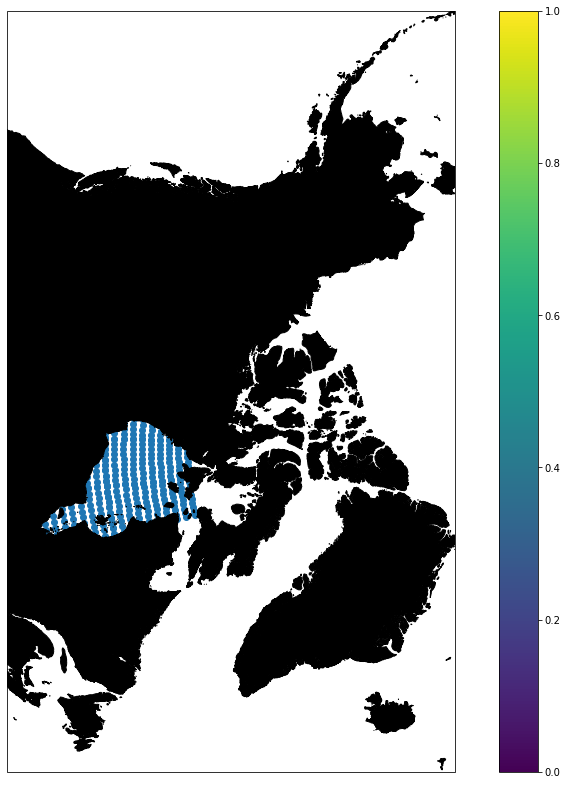

In [81]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 

fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90]) 
# cbarlabel='Difference(March-Sept)' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
cont1=ax1.scatter(lon,lat,transform=ccrs.PlateCarree(),cmap='seismic',marker='o',vmin=1,vmax=6)
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
# cbar.set_label(cbarlabel, rotation=90, fontsize=18)
# cbar.ax.tick_params(labelsize=18)
plt.show()

plot HS polygon on map

In [12]:
from shapely.geometry import Polygon
coords=[(-79.0, 65.0), (-60.0,61.20), (-60.0,56.0), (-79.0, 59.0)]
poly = Polygon(coords)
print(poly)

POLYGON ((-79 65, -60 61.2, -60 56, -79 59, -79 65))


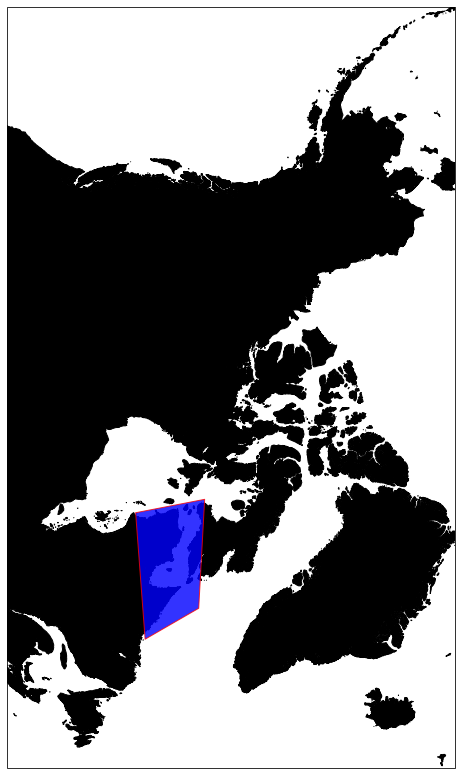

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 

fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90]) 
# cbarlabel='Difference(March-Sept)' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
ax1.add_geometries([poly], crs=ccrs.PlateCarree(), facecolor='b', edgecolor='red', alpha=0.8)
plt.show()

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
#checking the his file output
folder='basic_test_model_12dom/stochModel/'
hisfil1=folder+'work5/output/canada_model_0000_his.nc'
hisfil2=folder+'work2/output/canada_model_0000_his.nc'
hisdata1=xr.open_dataset(hisfil1)
hisdata2=xr.open_dataset(hisfil2)
hisfilo=folder+'optimized_model/output/canada_model_0000_his.nc'
hisdatao=xr.open_dataset(hisfilo)

In [5]:
hmod=hisdata1.waterlevel
hmod2=hisdata2.waterlevel
hmodo=hisdatao.waterlevel
hisdatao.time

<xarray.DataArray 'time' (time: 2978)>
array(['2019-12-25T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-01T00:15:00.000000000', ..., '2020-01-31T23:30:00.000000000',
       '2020-01-31T23:45:00.000000000', '2020-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-12-25 2020-01-01 ... 2020-02-01
Attributes:
    standard_name:  time

In [6]:
tgfile=os.path.join(location,'stochObserver','churchill_jan.wl')
hdata=np.array(np.loadtxt(tgfile,skiprows=2,usecols=1))
hdatameanred=hdata-np.mean(hdata)

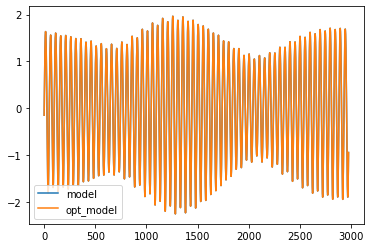

In [10]:
diff=hmod[1:,0]-hdatameanred
plt.plot(hmod[1:,0],label='model')
# plt.plot(hdatameanred,label='obs')
# plt.plot(hmod2[1:,0],label='old_model')
plt.plot(hmodo[1:,0],label='opt_model')
plt.legend()

In [8]:
h1=hisdata1.waterlevel
# h2=hisdata2.waterlevel
# diff=h1-h2
print(hisdata1.time.values)

['2019-12-25T00:00:00.000000000']


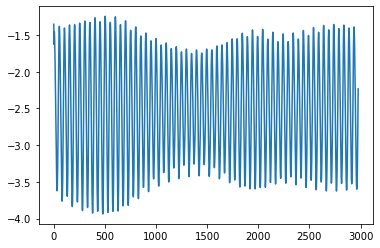

In [12]:
import matplotlib.pyplot as plt
plt.plot(diff)

In [4]:
#checking the his file output
folder='basic_test_model_12dom/stochModel/optimized_model/output/'
mapfile=folder+'canada_model_merged_map.nc'
mapdata=xr.open_dataset(mapfile)
mapdata.info()

xarray.Dataset {
dimensions:
	nFlowElem = 281835 ;
	nFlowElemContourPts = 4 ;
	nFlowLink = 529614 ;
	nFlowLinkPts = 2 ;
	nNetElem = 281835 ;
	nNetElemMaxNode = 4 ;
	nNetLink = 560343 ;
	nNetLinkContourPts = 4 ;
	nNetLinkPts = 2 ;
	nNetNode = 278376 ;
	nPartitions = 8 ;
	time = 385 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
	timedelta64[ns] timestep(time) ;
		timestep:standard_name = timestep ;
	float32 mesh2d_enclosure_container() ;
		mesh2d_enclosure_container:geometry_type = multipolygon ;
		mesh2d_enclosure_container:node_count = mesh2d_enc_node_count ;
		mesh2d_enclosure_container:node_coordinates = mesh2d_enc_x mesh2d_enc_y ;
		mesh2d_enclosure_container:part_node_count = mesh2d_enc_part_node_count ;
		mesh2d_enclosure_container:interior_ring = mesh2d_enc_interior_ring ;
	int32 Mesh2D() ;
		Mesh2D:cf_role = mesh_topology ;
		Mesh2D:node_coordinates = NetNode_x NetNode_y ;
		Mesh2D:node_dimension = nNetNode ;
		Mesh2D:edge_node_connectivity = NetLink ;

385

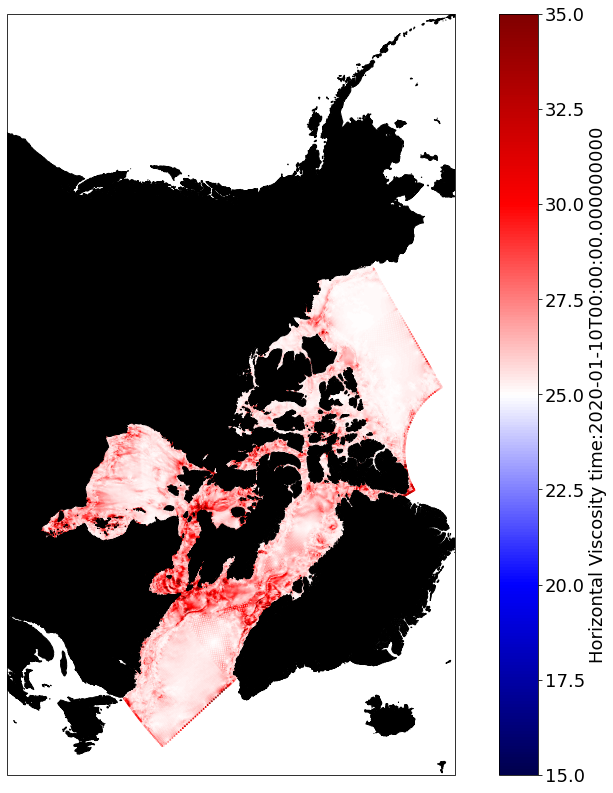

In [18]:

# plt.scatter(mapdata.FlowLink_xu,mapdata.FlowLink_yu,c=arr)
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
# FFWriter=animation.FFMpegWriter(extra_args=['-vcodec', 'libx264'])
# def update(i):
#     i=int(i)
#     arr=mapdata.viu.values[i,:]
#     cont1=ax1.scatter(mapdata.FlowLink_xu,mapdata.FlowLink_yu,c=arr,transform=ccrs.PlateCarree(),cmap='seismic',marker='^',s=1,vmin=0,vmax=100)
#     return cont1,   
# # marking the x-axis and y-axis 
# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90]) 

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
i=-1
arr=mapdata.viu.values[i,:]
cont1=ax1.scatter(mapdata.FlowLink_xu,mapdata.FlowLink_yu,c=arr,transform=ccrs.PlateCarree(),cmap='seismic',marker='^',s=1,vmin=15,vmax=35)
ti=mapdata.time[i]
cbarlabel='Horizontal Viscosity time:'+str(ti.values) 
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
# ani=FuncAnimation(fig,update,frames=np.linspace(0,96,97),blit=True)
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
cbar.set_label(cbarlabel, rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
# ani.save('vismovie.mp4',writer=FFWriter)
# plt.show()
plt.savefig('Horizontal_vis_'+str(ti.values)+'.jpg',dpi=200)

In [13]:
#shear and bulk viscosities of sea ice EVP and shiming yu ppt
P_s=25.
h=1.
C=20.
A=0.9
deltao=2e-09
e=2.
P=P_s*h*np.exp(-C*(1-A))
zeta=P/(2*deltao)
eta=zeta/e**2
print(eta)
print(zeta)

211461380.05720744
845845520.2288297


Xml file reading and writing.

In [74]:
root[0].iter()

{}

	
	
{'status': 'use', 'standardDeviation': '0.05', 'minDateTime': '202001010000', 'maxDateTime': '202002010000', 'id': 'churchill_jan.waterlevel'}

		churchill_jan.noos
	
{'status': 'use', 'standardDeviation': '0.05', 'minDateTime': '202001010000', 'maxDateTime': '202002010000', 'id': 'whalecove_jan.waterlevel'}

		whalecove_jan.noos
	


In [ ]:
xmlns="http://www.openda.org" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openda.org http://schemas.openda.org/observation/noosObservations.xsd"